OrderedDict([('cx', 2), ('h', 1), ('Param-Gate', 1)])


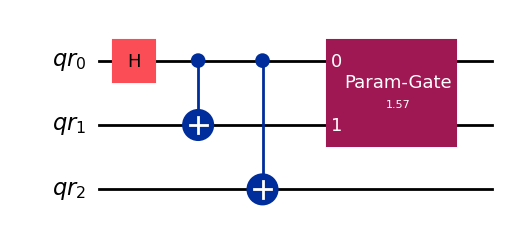

In [6]:
# PURPOSE:
# This example demonstrates how to build a parameterized composite gate in Qiskit.
# A composite gate is a reusable subcircuit that can be inserted into larger
# quantum circuits. By including a parameter (θ), we allow for dynamic control
# of gate behavior (e.g., variable rotations).
# This is useful in variational algorithms, optimization routines, and QML.
# -----------------------------------------------------------------------------

from qiskit import QuantumCircuit, QuantumRegister
from qiskit.circuit import Parameter
import matplotlib.pyplot as plt

%matplotlib inline 

# -----------------------------
# Step 1: Define a symbolic parameter
# This parameter can be used inside gates like Rz(θ)
# -----------------------------
theta = Parameter('θ')  # A symbolic placeholder for a rotation angle

# -----------------------------
# Step 2: Create a subcircuit with parameterized gates
# This will act as our reusable composite gate
# -----------------------------
qr_sub = QuantumRegister(2, name="qr_c")  # 2-qubit register for the subcircuit
comp_qc = QuantumCircuit(qr_sub, name="Param-Gate")

# Add gates to the subcircuit:
comp_qc.h(0)             # Hadamard on qubit 0
comp_qc.rz(theta, 1)     # Rz rotation on qubit 1, parameterized by θ
comp_qc.cx(0, 1)         # CNOT between qubit 0 and 1

# Convert the subcircuit to an Instruction so we can insert it later
composite_gate = comp_qc.to_instruction()

# -----------------------------
# Step 3: Create a larger main circuit
# We will insert our composite gate into this circuit
# -----------------------------
qr_main = QuantumRegister(3, name="qr")  # 3-qubit register
main_qc = QuantumCircuit(qr_main)

# Add initial gates to the main circuit
main_qc.h(0)
main_qc.cx(0, 1)
main_qc.cx(0, 2)

# Insert our composite gate onto qubits 0 and 1
main_qc.append(composite_gate, [qr_main[0], qr_main[1]])

# -----------------------------
# Step 4: Bind a numeric value to θ (e.g., θ = π/2)
# This makes the circuit executable
# -----------------------------
bound_circuit = main_qc.assign_parameters({theta: 3.1415 / 2})

# -----------------------------
# Step 5: Visualize the final circuit with θ = π/2
# -----------------------------
bound_circuit.draw('mpl')

print(bound_circuit.count_ops())

